## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [1]:
# import os
import keras

# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units = 10, num_neurons = [512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name = "hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name = "hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output_layer")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs = [out])
    
    return model

In [6]:
"""Code Here
設定超參數
"""
Learning_rate = 1e-3
Epochs = 50
Batch_size = 1024
Momentum = 0.95

In [8]:
# 載入 Callbacks
"""Code Here
設定 callbacks: model checkpoint
"""
from keras.callbacks import ModelCheckpoint

model_ckpt = []
for i, cond in enumerate([False, True]):
    ckpt = ModelCheckpoint(filepath="./tmp-%s.h5" %str(cond),
                           monitor="val_loss",
                           save_best_only=cond)
    model_ckpt.append(ckpt)

In [9]:
model_ckpt

In [10]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for i, ckpt in enumerate(model_ckpt):
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=Learning_rate, nesterov=True, momentum=Momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.fit(x_train, y_train, epochs =Epochs, batch_size=Batch_size,
              validation_data = (x_test, y_test), shuffle = True, callbacks=[ckpt])
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    model = keras.models.load_model("./tmp-%s.h5" %str(bool(i)))
    loss_loadback, acc_loadback = model.evaluate(x_test, y_test)
    
    exp_name_tag = "exp-save_best_only-%s" %str(bool(i))
    results[exp_name_tag] = {"train_loss": train_loss,
                             "valid_loss": valid_loss,
                             "train_acc": train_acc,
                             "valid_acc": valid_acc,
                             "loss_loadback": loss_loadback,
                             "acc_loadback": acc_loadback}

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512 

50000/50000 [==============================] - 2s 32us/step - loss: 0.5692 - accuracy: 0.8296 - val_loss: 1.6497 - val_accuracy: 0.4963
Epoch 46/50
50000/50000 [==============================] - 2s 32us/step - loss: 0.5511 - accuracy: 0.8381 - val_loss: 1.6440 - val_accuracy: 0.4952
Epoch 47/50
50000/50000 [==============================] - 2s 32us/step - loss: 0.5341 - accuracy: 0.8434 - val_loss: 1.6600 - val_accuracy: 0.4909
Epoch 48/50
50000/50000 [==============================] - 2s 32us/step - loss: 0.5200 - accuracy: 0.8500 - val_loss: 1.6630 - val_accuracy: 0.4965
Epoch 49/50
50000/50000 [==============================] - 2s 32us/step - loss: 0.5011 - accuracy: 0.8584 - val_loss: 1.6781 - val_accuracy: 0.4970
Epoch 50/50
10000/10000 [==============================] - 1s 74us/step
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)          

50000/50000 [==============================] - 2s 32us/step - loss: 0.6583 - accuracy: 0.7966 - val_loss: 1.5631 - val_accuracy: 0.4953
Epoch 41/50
50000/50000 [==============================] - 2s 32us/step - loss: 0.6409 - accuracy: 0.8050 - val_loss: 1.5764 - val_accuracy: 0.4944
Epoch 42/50
50000/50000 [==============================] - 2s 32us/step - loss: 0.6243 - accuracy: 0.8111 - val_loss: 1.5841 - val_accuracy: 0.4911
Epoch 43/50
50000/50000 [==============================] - 2s 32us/step - loss: 0.6056 - accuracy: 0.8194 - val_loss: 1.6090 - val_accuracy: 0.4877
Epoch 44/50
50000/50000 [==============================] - 2s 32us/step - loss: 0.5874 - accuracy: 0.8270 - val_loss: 1.6094 - val_accuracy: 0.4877
Epoch 45/50
50000/50000 [==============================] - 2s 32us/step - loss: 0.5689 - accuracy: 0.8344 - val_loss: 1.6232 - val_accuracy: 0.4936
Epoch 46/50
50000/50000 [==============================] - 2s 32us/step - loss: 0.5541 - accuracy: 0.8406 - val_loss: 1.6147

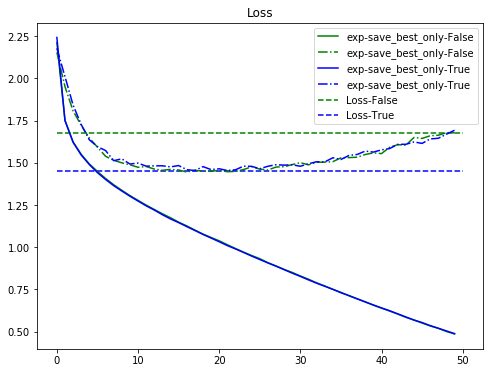

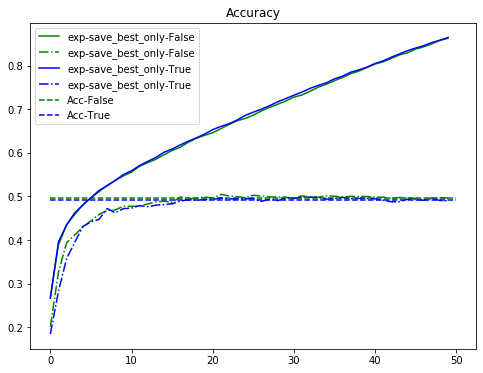

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
c_bar = ["g", "b"]

plt.figure(figsize = (8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train_loss"])), results[cond]["train_loss"],
             "-", label = cond, c = c_bar[i])
    plt.plot(range(len(results[cond]["valid_loss"])), results[cond]["valid_loss"],
             "-.", label = cond, c= c_bar[i])
    plt.hlines(y = results[cond]["loss_loadback"], xmin=0, xmax = len(results[cond]["train_loss"]),
           linestyle = "--", label = "Loss-%s" %str(bool(i)), color = c_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train_acc"])), results[cond]["train_acc"],
             "-", label = cond, c = c_bar[i])
    plt.plot(range(len(results[cond]["valid_acc"])), results[cond]["valid_acc"],
             "-.", label = cond, c= c_bar[i])
    plt.hlines(y = results[cond]["acc_loadback"], xmin = 0, xmax = len(results[cond]["train_acc"]),
               linestyle = "--", label = "Acc-%s" %str(bool(i)), color = c_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()